In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from func import *
import jieba
import re
import os
# re -> \d for number, \s for any space (\t\r\n...)

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from PIL import Image

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it

import jieba
import re
import numpy as np
from PIL import Image
from func import *

#### 讀取資料夾中的資料

In [4]:
path = 'C:/Users/User/Desktop/python playground/week5/second.txt'
title, data = readdir(path, 0.6)


Number of files : 1


#### 顯示部份資料內容

In [5]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:50], '...', data[i][-50:-1], sep='\n', end='\n\n')

----Document : second----

1.	鴻夏戀一波三折 回顧4年全紀錄
日本媒體報導，夏普（Sharp）已接受鴻海提出的重整方案
...
清一些細節」。

此外，鴻海收購夏普這一方案還需得到夏普股東的批准，會否節外生枝，拭目以待。



#### 新增詞彙至自定義詞庫，並匯入該詞庫

In [6]:
savetofile('./dict1.txt', [['轉虧為盈']])
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.792 seconds.
Prefix dict has been built succesfully.


#### 顯示部分資料內容

In [7]:
stopword= ['一','二','三','四','五','六','用','淨','利','值','前','據','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可','他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於','較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終','把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的','並','更','就','註','有','事','來','不','從','堺','從','卻','說','要','才','其','長','了','百','億','元','例如','可能','由於','因此',
             '土城','一份','上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分','事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元','企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二','雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
       '日本','之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中','因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大','資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為','預估','預算',
       '維持','公開','整體','表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海','夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012','10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董','能力','進','廠','內','購','併','這','看','人','被','能','外界','指出',
           '財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下','已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出','社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高','市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','7000','3500','2015','2016','25','30']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;○<=>@[]^_{}|~\\\""

#### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(jieba.cut(data[i], cut_all=False))

Number of word in document (second) :  2855
[('\r\n', 501), (' ', 148), ('技術', 53), ('OLED', 45), ('負債', 35), ('投資', 29), ('收購', 23), ('未來', 21), ('\t', 17), ('股權', 17)]


#### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 50
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : second----
	, 一波三折, 回顧, 全紀錄, Sharp, 重整, 回顧鴻夏戀, 過程, 一波, 多折, 努力, 期待, 開花, 經濟, 新聞, 今天上午, 臨時, 將成, 規模, 戀情, 高潮迭起, 充滿, 戲劇, 張力, 合作, 溝通, 協商, 角力, 沉潛, 喊話, 消息, 屬實, 年力爭, 終於開花, 以下, 夏戀, 大事, 紀, 27, 公告, FoxconnFarEast, Ltd, 鴻準, 2354, 和鴻準, Q, RUNHOLDINGS, LTD, 規劃, 每股, 


#### 利用 wordDictionary 移除只出現一次的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : second

 1 .  鴻     4 年  
 日本 媒體  ， 夏普 （  ） 已  鴻海 提 的  ...」 。 
 
  ， 鴻海  夏普  方案   夏普 股 的  ，  節  ， 拭目以 。 



#### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

#### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : second
    鴻      年   日本 媒體 ...  夏普 股 的    節   拭目以 



#### 初始化 TFIDF 物件

In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.3, analyzer = 'word', stop_words = stopword)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

#### 顯示初始化時輸入的停止詞彙

In [14]:
print(tfidf_vectorizer.get_stop_words())

frozenset({'已', '比', '假設', '率', 'IGZO', '加上', '股份有限公司', '文件', '計算', '月', '科目', '稅後淨利', '一', '赴', '郭台銘', '這', '萬張', '報告增加', '第二', '意見', '公開', '被', '會計', '蘋果', 'SDP', 'WitsView', '用', '方案', '年本', '再', '決定', '6', '都', '共為', '故', '雙方', '媒體', '六', '認為', '評估', '4', '例如', '較', '經營', '從', '到', '其他', '成本', '預算', '二', '約', '說明', '才', '最大', '事項', '日圓', '主要', '2016', '使用', '鴻海', '總額', '供應商', '程序', '包括', '大', '3', '日本', '2', '億', '不過', '不會', '元', '最終', '金額', '總部', '另', '註', '若', '一副', '就', '來', '代廠', '1', '減損', '支出', '邱', '本', '加工', '財務', '於', '報告', '其中', '能', '並', '將', '確性', '上午', '開關鍵', '正確性', '就是', '五', '而', '召開', '購', '指出', '只是', '可能', '企業', '中', '外界', '部分', '維持', '今天', '以及', '傳出', 'Display', '重要', '該', '提供', '總資產', '之', '佔', '代工', '後', '之一', '品牌', '整體', '事', '以', '及', '現金', '營業外', '大阪', '市場', '入座', '7', '表示', '人士', '判斷', '向', '今年', '因此', '8', '社長', '三', 'LG', '取得', '尺寸', '詳合', '工廠', '值', '0', '讓', '股東', '仟元', '因應', '三星', '會', '了', '如下', '依', '對', '年', '更', '夏', '合理性', '2012', '預估', '報導', '目前',

#### 計算 TFIDF 詞頻矩陣

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

#### 顯示詞頻矩陣大小

In [16]:
tfidf_matrix.shape

(1, 84)

#### 顯示部份詞頻矩陣中的字詞

In [17]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一二', '一支', '三幣', '下一', '不乎', '不棄', '不消', '並訪', '並達', '之列', '之霸', '事後責', '二日', '二體', '今午', '任堂', '企價', '企圖', '停停', '債額', '兩千圓', '兩大家', '再拉', '協定', '同可', '四千百', '在得', '大卸塊', '始料及', '媽媽', '定之', '將於', '將立', '將透', '後一塊', '後攤牌', '後時刻', '意的', '愛的', '拚鴻', '拭目以', '拿穩', '新一', '新幣', '日史', '日後', '晶圓廠', '更輕', '會換', '會識']


In [18]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    for j in range(len(words)):
        if tfidf_matrix[i,j] > 0.2:
              print(words[j], tfidf_matrix[i,j])

----Document : second----
二體 0.44971901339751685
日後 0.22485950669875843
次世 0.29981267559834457
銘個 0.3747658444979307


In [19]:
dist = cosine_similarity(tfidf_matrix)
print(dist)

[[1.]]


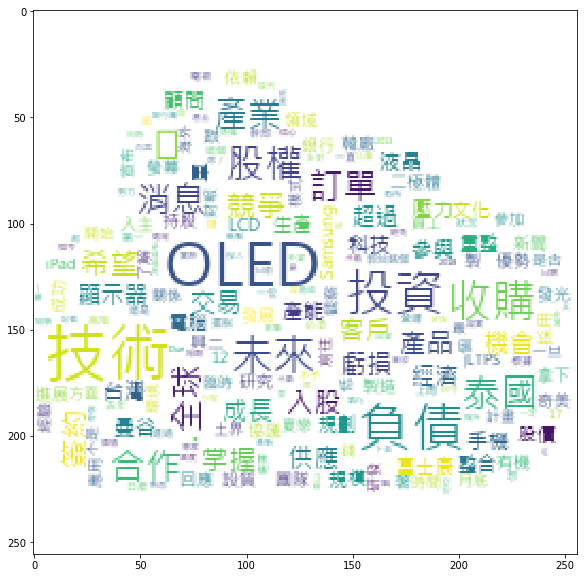

In [20]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("week4/cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("week5/second.png")